# Credit Risk Data Exploration

## Overview
This notebook performs comprehensive exploratory data analysis (EDA) on the credit risk dataset. We will:

1. **Data Loading**: Load the training dataset from CSV
2. **Data Summary**: Generate descriptive statistics and data quality metrics
3. **Data Visualization**: Create various charts and graphs to understand data distributions and relationships
4. **Insights**: Extract key insights to inform model development

## Dataset
- **Source**: `/mnt/data/Credit-Risk-Model/data/train_data_10.csv`
- **Purpose**: Credit risk modeling and default prediction

Let's begin our exploration!

## 1. Data Loading and Initial Setup

First, let's import the necessary libraries and load our dataset.

In [15]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

# Configure display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
plt.style.use('default')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")

Libraries imported successfully!


In [16]:
# Load the dataset
data_path = "/mnt/data/Credit-Risk-Model/data/train_data_10.csv"

try:
    df = pd.read_csv(data_path)
    print(f"Dataset loaded successfully!")
    print(f"Shape: {df.shape}")
    print(f"Columns: {df.columns.tolist()}")
except FileNotFoundError:
    print(f"Error: File not found at {data_path}")
    # Show available files for debugging
    import os
    if os.path.exists("/mnt/data/Credit-Risk-Model/data/"):
        print("Available files in data directory:")
        for file in os.listdir("/mnt/data/Credit-Risk-Model/data/"):
            if file.endswith('.csv'):
                print(f"  - {file}")
except Exception as e:
    print(f"Error loading data: {e}")

Dataset loaded successfully!
Shape: (100000, 62)
Columns: ['duration', 'credit_amount', 'installment_rate', 'residence', 'age', 'credits', 'dependents', 'checking_account_A11', 'checking_account_A12', 'checking_account_A13', 'checking_account_A14', 'credit_history_A30', 'credit_history_A31', 'credit_history_A32', 'credit_history_A33', 'credit_history_A34', 'purpose_A40', 'purpose_A41', 'purpose_A410', 'purpose_A42', 'purpose_A43', 'purpose_A44', 'purpose_A45', 'purpose_A46', 'purpose_A48', 'purpose_A49', 'savings_A61', 'savings_A62', 'savings_A63', 'savings_A64', 'savings_A65', 'employment_since_A71', 'employment_since_A72', 'employment_since_A73', 'employment_since_A74', 'employment_since_A75', 'status_A91', 'status_A92', 'status_A93', 'status_A94', 'debtors_guarantors_A101', 'debtors_guarantors_A102', 'debtors_guarantors_A103', 'property_A121', 'property_A122', 'property_A123', 'property_A124', 'other_installments_A141', 'other_installments_A142', 'other_installments_A143', 'housing_

## 2. Data Summary and Quality Assessment

Let's examine the structure, quality, and basic statistics of our dataset.

In [17]:
# Basic dataset information
print("=== DATASET OVERVIEW ===")
print(f"Dataset shape: {df.shape}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print()

# Display first few rows
print("=== FIRST 5 ROWS ===")
display(df.head())

print("\n=== LAST 5 ROWS ===")
display(df.tail())

=== DATASET OVERVIEW ===
Dataset shape: (100000, 62)
Memory usage: 47.30 MB

=== FIRST 5 ROWS ===


,duration,credit_amount,installment_rate,residence,age,credits,dependents,checking_account_A11,checking_account_A12,checking_account_A13,checking_account_A14,credit_history_A30,credit_history_A31,credit_history_A32,credit_history_A33,credit_history_A34,purpose_A40,purpose_A41,purpose_A410,purpose_A42,purpose_A43,purpose_A44,purpose_A45,purpose_A46,purpose_A48,purpose_A49,savings_A61,savings_A62,savings_A63,savings_A64,savings_A65,employment_since_A71,employment_since_A72,employment_since_A73,employment_since_A74,employment_since_A75,status_A91,status_A92,status_A93,status_A94,debtors_guarantors_A101,debtors_guarantors_A102,debtors_guarantors_A103,property_A121,property_A122,property_A123,property_A124,other_installments_A141,other_installments_A142,other_installments_A143,housing_A151,housing_A152,housing_A153,job_A171,job_A172,job_A173,job_A174,telephone_A191,telephone_A192,foreign_worker_A201,foreign_worker_A202,credit
0,0.294118,0.178167,0.666667,1.000000,0.071429,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1
1,0.294118,0.246836,0.333333,1.000000,0.107143,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0
2,0.205882,0.179322,1.000000,0.000000,0.107143,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1
3,0.073529,0.091834,1.000000,0.666667,0.285714,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1
4,0.294118,0.209475,0.666667,0.666667,0.428571,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0



=== LAST 5 ROWS ===


,duration,credit_amount,installment_rate,residence,age,credits,dependents,checking_account_A11,checking_account_A12,checking_account_A13,checking_account_A14,credit_history_A30,credit_history_A31,credit_history_A32,credit_history_A33,credit_history_A34,purpose_A40,purpose_A41,purpose_A410,purpose_A42,purpose_A43,purpose_A44,purpose_A45,purpose_A46,purpose_A48,purpose_A49,savings_A61,savings_A62,savings_A63,savings_A64,savings_A65,employment_since_A71,employment_since_A72,employment_since_A73,employment_since_A74,employment_since_A75,status_A91,status_A92,status_A93,status_A94,debtors_guarantors_A101,debtors_guarantors_A102,debtors_guarantors_A103,property_A121,property_A122,property_A123,property_A124,other_installments_A141,other_installments_A142,other_installments_A143,housing_A151,housing_A152,housing_A153,job_A171,job_A172,job_A173,job_A174,telephone_A191,telephone_A192,foreign_worker_A201,foreign_worker_A202,credit
99995,0.294118,0.036591,1.000000,0.333333,0.017857,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0
99996,0.470588,0.108672,1.000000,1.000000,0.678571,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0
99997,0.294118,0.037911,1.000000,0.333333,0.053571,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0
99998,0.117647,0.025806,0.333333,0.333333,0.214286,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0
99999,0.117647,0.025806,0.333333,0.333333,0.214286,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0


In [18]:
# Data types and basic info
print("=== DATA TYPES AND INFO ===")
df.info()

print("\n=== COLUMN DETAILS ===")
dtype_summary = df.dtypes.value_counts()
print("Data type distribution:")
for dtype, count in dtype_summary.items():
    print(f"  {dtype}: {count} columns")
    
print(f"\nTotal columns: {len(df.columns)}")
print(f"Numeric columns: {len(df.select_dtypes(include=[np.number]).columns)}")
print(f"Categorical/Object columns: {len(df.select_dtypes(include=['object']).columns)}")

# Define column types for use in later cells
numeric_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(include=['object']).columns

=== DATA TYPES AND INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 62 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration                 100000 non-null  float64
 1   credit_amount            100000 non-null  float64
 2   installment_rate         100000 non-null  float64
 3   residence                100000 non-null  float64
 4   age                      100000 non-null  float64
 5   credits                  100000 non-null  float64
 6   dependents               100000 non-null  float64
 7   checking_account_A11     100000 non-null  float64
 8   checking_account_A12     100000 non-null  float64
 9   checking_account_A13     100000 non-null  float64
 10  checking_account_A14     100000 non-null  float64
 11  credit_history_A30       100000 non-null  float64
 12  credit_history_A31       100000 non-null  float64
 13  credit_history_A32       100000 

In [19]:
# Missing values analysis
print("=== MISSING VALUES ANALYSIS ===")
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Column': df.columns,
    'Missing Count': missing_values,
    'Missing Percentage': missing_percentage
}).sort_values('Missing Count', ascending=False)

print("Missing values summary:")
display(missing_df[missing_df['Missing Count'] > 0])

# Store missing count for use in later cells
missing_count = missing_df['Missing Count'].sum()
if missing_count == 0:
    print("✓ No missing values found in the dataset!")
else:
    print(f"Total missing values: {missing_count}")
    print(f"Columns with missing values: {(missing_df['Missing Count'] > 0).sum()}")

=== MISSING VALUES ANALYSIS ===
Missing values summary:


,Column,Missing Count,Missing Percentage


✓ No missing values found in the dataset!


In [20]:
# Descriptive statistics for numerical columns
print("=== DESCRIPTIVE STATISTICS ===")

if len(numeric_cols) > 0:
    print("Numerical columns statistics:")
    display(df[numeric_cols].describe().round(3))
    
    print("\n=== ADDITIONAL STATISTICS ===")
    additional_stats = pd.DataFrame({
        'Skewness': df[numeric_cols].skew(),
        'Kurtosis': df[numeric_cols].kurtosis(),
        'Min': df[numeric_cols].min(),
        'Max': df[numeric_cols].max(),
        'Range': df[numeric_cols].max() - df[numeric_cols].min()
    }).round(3)
    display(additional_stats)
else:
    print("No numerical columns found for statistical analysis.")

=== DESCRIPTIVE STATISTICS ===
Numerical columns statistics:


,duration,credit_amount,installment_rate,residence,age,credits,dependents,checking_account_A11,checking_account_A12,checking_account_A13,checking_account_A14,credit_history_A30,credit_history_A31,credit_history_A32,credit_history_A33,credit_history_A34,purpose_A40,purpose_A41,purpose_A410,purpose_A42,purpose_A43,purpose_A44,purpose_A45,purpose_A46,purpose_A48,purpose_A49,savings_A61,savings_A62,savings_A63,savings_A64,savings_A65,employment_since_A71,employment_since_A72,employment_since_A73,employment_since_A74,employment_since_A75,status_A91,status_A92,status_A93,status_A94,debtors_guarantors_A101,debtors_guarantors_A102,debtors_guarantors_A103,property_A121,property_A122,property_A123,property_A124,other_installments_A141,other_installments_A142,other_installments_A143,housing_A151,housing_A152,housing_A153,job_A171,job_A172,job_A173,job_A174,telephone_A191,telephone_A192,foreign_worker_A201,foreign_worker_A202,credit
count,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.00,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.0
mean,0.250,0.141,0.668,0.581,0.247,0.102,0.120,0.290,0.295,0.039,0.363,0.027,0.037,0.561,0.073,0.212,0.173,0.056,0.012,0.154,0.207,0.015,0.017,0.039,0.007,0.083,0.610,0.071,0.049,0.054,0.151,0.032,0.159,0.268,0.159,0.185,0.034,0.278,0.51,0.059,0.924,0.037,0.032,0.220,0.183,0.332,0.139,0.107,0.029,0.827,0.161,0.732,0.095,0.012,0.168,0.617,0.102,0.576,0.381,0.973,0.027,0.5
std,0.179,0.156,0.360,0.351,0.205,0.178,0.324,0.454,0.456,0.194,0.481,0.162,0.188,0.496,0.260,0.409,0.378,0.230,0.110,0.361,0.405,0.120,0.130,0.194,0.085,0.276,0.488,0.256,0.215,0.225,0.358,0.175,0.365,0.443,0.365,0.389,0.182,0.448,0.50,0.235,0.264,0.188,0.175,0.414,0.387,0.471,0.346,0.310,0.169,0.378,0.368,0.443,0.293,0.110,0.374,0.486,0.303,0.494,0.486,0.162,0.162,0.5
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0
25%,0.118,0.049,0.333,0.333,0.089,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.0
50%,0.206,0.072,0.667,0.667,0.196,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.00,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,1.0
75%,0.294,0.179,1.000,1.000,0.321,0.333,0.000,1.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,1.00,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,1.000,1.000,0.000,1.0
max,0.824,0.864,1.000,1.000,0.982,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


=== ADDITIONAL STATISTICS ===


,Skewness,Kurtosis,Min,Max,Range
duration,1.105,0.686,0.0,0.824,0.824
credit_amount,2.313,5.853,0.0,0.864,0.864
installment_rate,-0.533,-1.164,0.0,1.000,1.000
residence,-0.065,-1.345,0.0,1.000,1.000
age,1.325,1.234,0.0,0.982,0.982
...,...,...,...,...,...
telephone_A191,-0.306,-1.906,0.0,1.000,1.000
telephone_A192,0.492,-1.758,0.0,1.000,1.000
foreign_worker_A201,-5.855,32.287,0.0,1.000,1.000
foreign_worker_A202,5.855,32.287,0.0,1.000,1.000


In [21]:
# Categorical columns analysis
print("=== CATEGORICAL COLUMNS ANALYSIS ===")

if len(categorical_cols) > 0:
    for col in categorical_cols[:10]:  # Show first 10 categorical columns
        print(f"\n--- {col} ---")
        value_counts = df[col].value_counts()
        print(f"Unique values: {df[col].nunique()}")
        print(f"Most frequent values:")
        display(value_counts.head())
        
        if df[col].nunique() > 20:
            print(f"... and {df[col].nunique() - 5} more unique values")
else:
    print("No categorical columns found in the dataset.")

=== CATEGORICAL COLUMNS ANALYSIS ===
No categorical columns found in the dataset.


## 3. Data Visualizations

Now let's create various visualizations to better understand the data distributions, relationships, and patterns.

### 3.1 Target Variable Analysis

First, let's examine the target variable (if it exists) and understand the class distribution.

In [22]:
# Identify potential target variable (common names for credit risk)
potential_targets = ['target', 'default', 'class', 'label', 'outcome', 'risk', 'y']
target_col = None

for col in df.columns:
    if col.lower() in potential_targets:
        target_col = col
        break

if target_col:
    print(f"Identified target variable: {target_col}")
    
    # Target variable distribution
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # Count plot
    df[target_col].value_counts().plot(kind='bar', ax=axes[0])
    axes[0].set_title(f'Distribution of {target_col}')
    axes[0].set_xlabel(target_col)
    axes[0].set_ylabel('Count')
    
    # Pie chart
    df[target_col].value_counts().plot(kind='pie', ax=axes[1], autopct='%1.1f%%')
    axes[1].set_title(f'Proportion of {target_col}')
    
    plt.tight_layout()
    plt.show()
    
    # Print statistics
    print(f"\nTarget variable statistics:")
    target_stats = df[target_col].value_counts()
    for value, count in target_stats.items():
        percentage = (count / len(df)) * 100
        print(f"  {value}: {count} ({percentage:.1f}%)")
        
else:
    print("No obvious target variable found. Examining all binary/categorical columns:")
    binary_cols = [col for col in df.columns if df[col].nunique() == 2]
    if binary_cols:
        print(f"Binary columns that might be targets: {binary_cols}")
    else:
        print("No binary columns found.")

No obvious target variable found. Examining all binary/categorical columns:
Binary columns that might be targets: ['dependents', 'checking_account_A11', 'checking_account_A12', 'checking_account_A13', 'checking_account_A14', 'credit_history_A30', 'credit_history_A31', 'credit_history_A32', 'credit_history_A33', 'credit_history_A34', 'purpose_A40', 'purpose_A41', 'purpose_A410', 'purpose_A42', 'purpose_A43', 'purpose_A44', 'purpose_A45', 'purpose_A46', 'purpose_A48', 'purpose_A49', 'savings_A61', 'savings_A62', 'savings_A63', 'savings_A64', 'savings_A65', 'employment_since_A71', 'employment_since_A72', 'employment_since_A73', 'employment_since_A74', 'employment_since_A75', 'status_A91', 'status_A92', 'status_A93', 'status_A94', 'debtors_guarantors_A101', 'debtors_guarantors_A102', 'debtors_guarantors_A103', 'property_A121', 'property_A122', 'property_A123', 'property_A124', 'other_installments_A141', 'other_installments_A142', 'other_installments_A143', 'housing_A151', 'housing_A152', '

### 3.2 Numerical Variable Distributions

Let's examine the distributions of numerical variables using histograms and box plots.

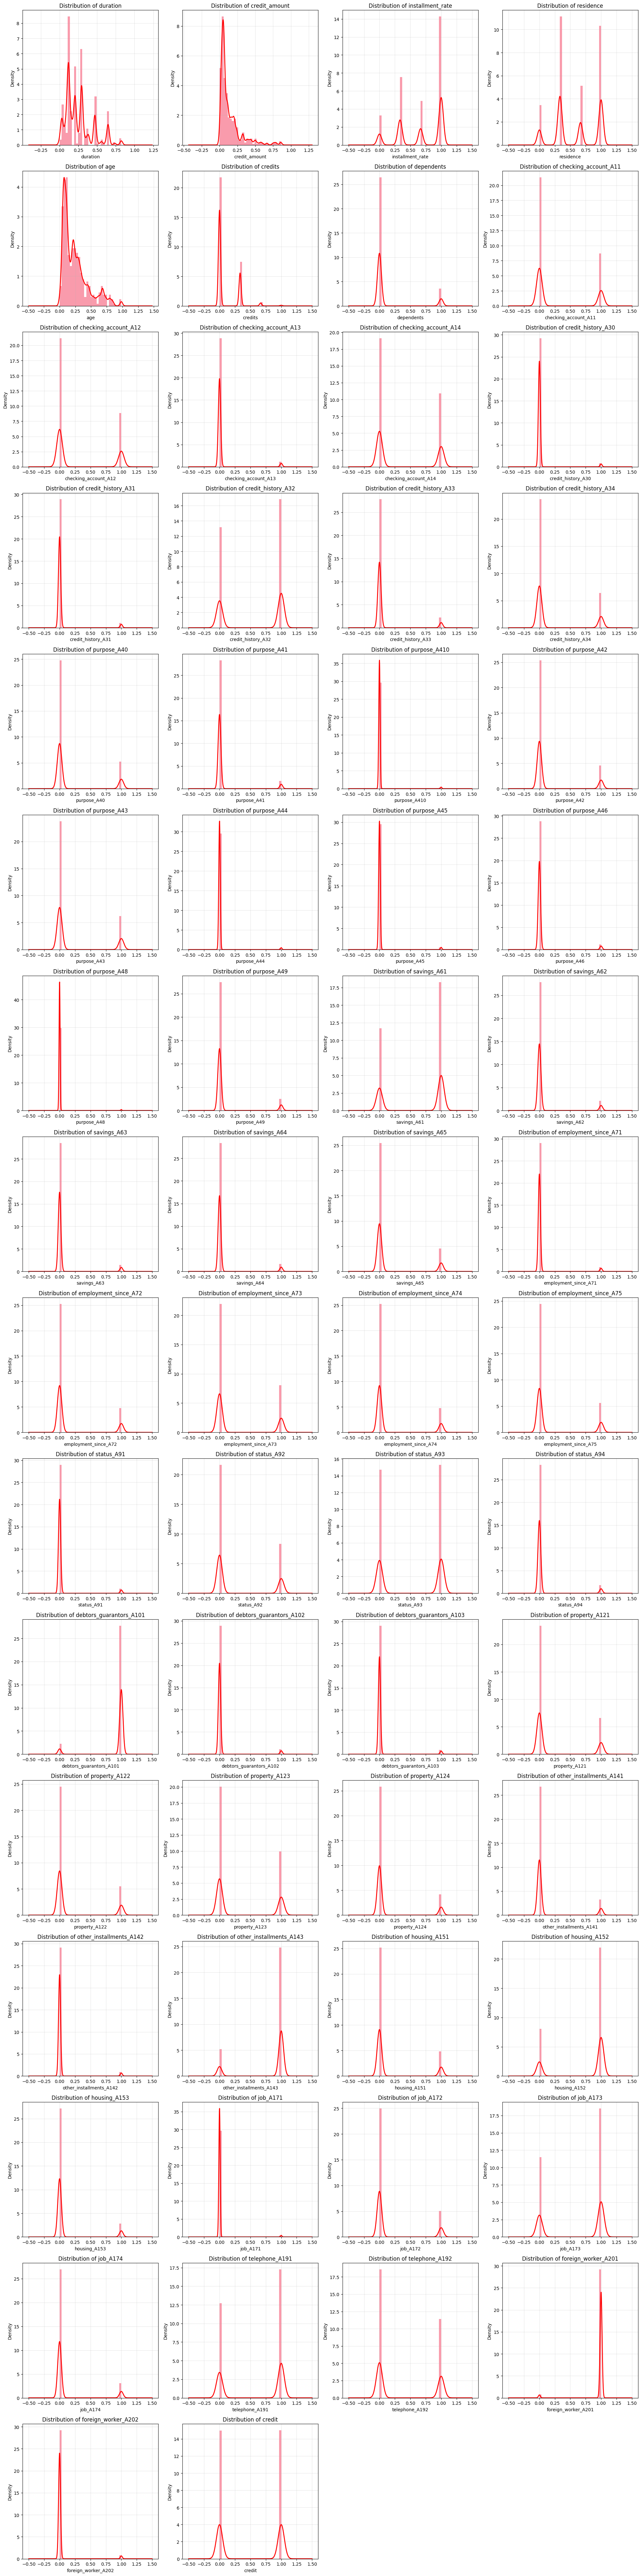

In [23]:
# Distribution plots for numerical variables
if len(numeric_cols) > 0:
    # Calculate optimal subplot grid
    n_cols_plot = min(4, len(numeric_cols))
    n_rows_plot = (len(numeric_cols) + n_cols_plot - 1) // n_cols_plot
    
    fig, axes = plt.subplots(n_rows_plot, n_cols_plot, figsize=(20, 5*n_rows_plot))
    if n_rows_plot == 1:
        axes = [axes] if len(numeric_cols) == 1 else axes
    else:
        axes = axes.flatten()
    
    for i, col in enumerate(numeric_cols):
        if i < len(axes):
            # Histogram with KDE
            df[col].hist(bins=30, ax=axes[i], alpha=0.7, density=True)
            df[col].plot(kind='kde', ax=axes[i], color='red', linewidth=2)
            axes[i].set_title(f'Distribution of {col}')
            axes[i].set_xlabel(col)
            axes[i].set_ylabel('Density')
            axes[i].grid(True, alpha=0.3)
    
    # Hide empty subplots
    for i in range(len(numeric_cols), len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()
else:
    print("No numerical columns found for distribution analysis.")

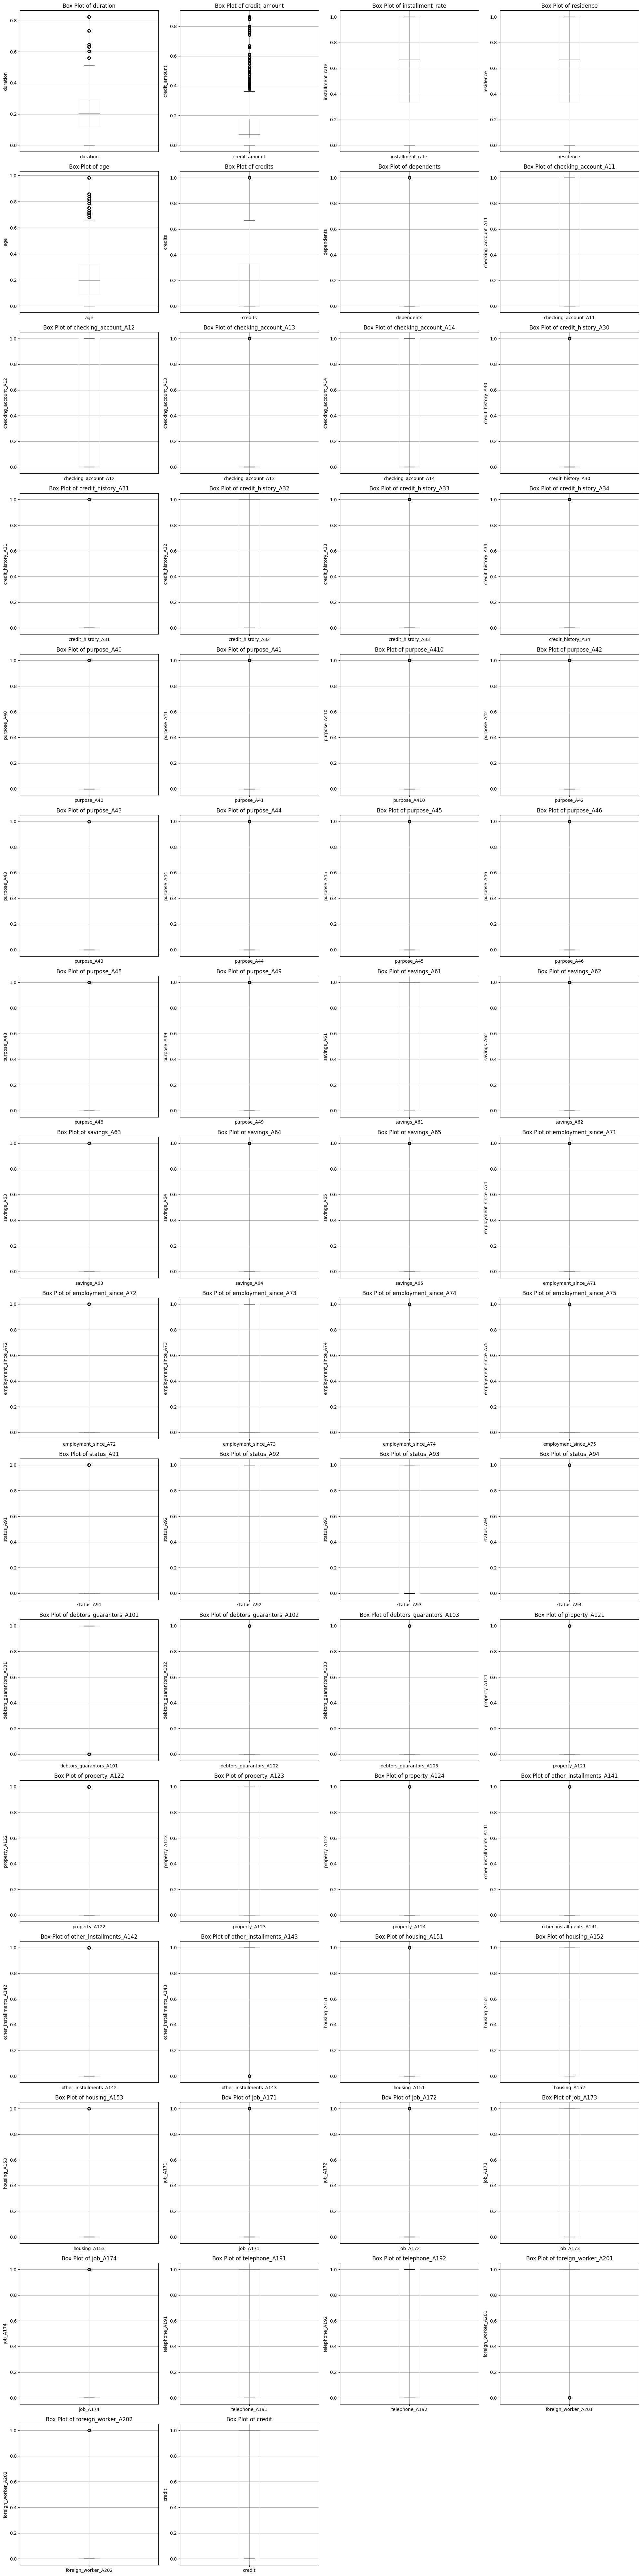

=== OUTLIER DETECTION SUMMARY ===
duration: 9026 outliers (9.0%)
credit_amount: 8784 outliers (8.8%)
installment_rate: 0 outliers (0.0%)
residence: 0 outliers (0.0%)
age: 7320 outliers (7.3%)
credits: 488 outliers (0.5%)
dependents: 11956 outliers (12.0%)
checking_account_A11: 0 outliers (0.0%)
checking_account_A12: 0 outliers (0.0%)
checking_account_A13: 3904 outliers (3.9%)
checking_account_A14: 0 outliers (0.0%)
credit_history_A30: 2684 outliers (2.7%)
credit_history_A31: 3660 outliers (3.7%)
credit_history_A32: 0 outliers (0.0%)
credit_history_A33: 7320 outliers (7.3%)
credit_history_A34: 21228 outliers (21.2%)
purpose_A40: 17321 outliers (17.3%)
purpose_A41: 5612 outliers (5.6%)
purpose_A410: 1220 outliers (1.2%)
purpose_A42: 15370 outliers (15.4%)
purpose_A43: 20740 outliers (20.7%)
purpose_A44: 1464 outliers (1.5%)
purpose_A45: 1708 outliers (1.7%)
purpose_A46: 3904 outliers (3.9%)
purpose_A48: 732 outliers (0.7%)
purpose_A49: 8296 outliers (8.3%)
savings_A61: 0 outliers (0.0%)


In [24]:
# Box plots for numerical variables
if len(numeric_cols) > 0:
    n_cols_plot = min(4, len(numeric_cols))
    n_rows_plot = (len(numeric_cols) + n_cols_plot - 1) // n_cols_plot
    
    fig, axes = plt.subplots(n_rows_plot, n_cols_plot, figsize=(20, 5*n_rows_plot))
    if n_rows_plot == 1:
        axes = [axes] if len(numeric_cols) == 1 else axes
    else:
        axes = axes.flatten()
    
    for i, col in enumerate(numeric_cols):
        if i < len(axes):
            df.boxplot(column=col, ax=axes[i])
            axes[i].set_title(f'Box Plot of {col}')
            axes[i].set_ylabel(col)
    
    # Hide empty subplots
    for i in range(len(numeric_cols), len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()
    
    # Outlier detection summary
    print("=== OUTLIER DETECTION SUMMARY ===")
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
        outlier_percentage = (len(outliers) / len(df)) * 100
        
        print(f"{col}: {len(outliers)} outliers ({outlier_percentage:.1f}%)")
else:
    print("No numerical columns found for box plot analysis.")

### 3.3 Correlation Analysis

Let's examine correlations between numerical variables.

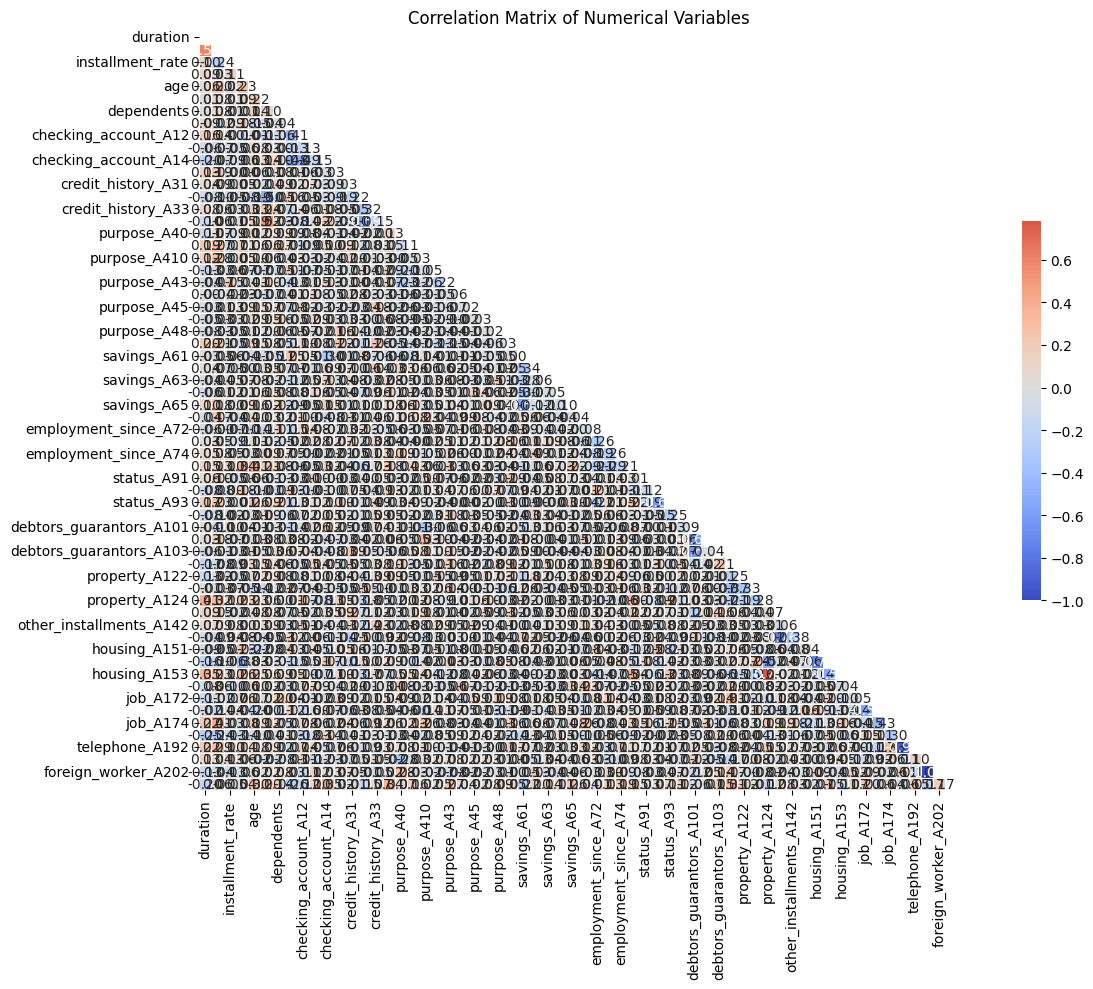

=== HIGH CORRELATION PAIRS (|correlation| > 0.7) ===
  foreign_worker_A201 ↔ foreign_worker_A202: -1.000
  telephone_A191 ↔ telephone_A192: -0.913
  property_A124 ↔ housing_A153: 0.783
  other_installments_A141 ↔ other_installments_A143: -0.758
  housing_A151 ↔ housing_A152: -0.723


In [25]:
# Correlation matrix and heatmap
if len(numeric_cols) >= 2:
    # Calculate correlation matrix
    correlation_matrix = df[numeric_cols].corr()
    
    # Create heatmap
    plt.figure(figsize=(14, 10))
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
                square=True, linewidths=0.5, cbar_kws={"shrink": .5}, fmt='.2f')
    plt.title('Correlation Matrix of Numerical Variables')
    plt.tight_layout()
    plt.show()
    
    # Find highly correlated pairs
    print("=== HIGH CORRELATION PAIRS (|correlation| > 0.7) ===")
    high_corr_pairs = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            corr_val = correlation_matrix.iloc[i, j]
            if abs(corr_val) > 0.7:
                high_corr_pairs.append((correlation_matrix.columns[i], 
                                       correlation_matrix.columns[j], 
                                       corr_val))
    
    if high_corr_pairs:
        for col1, col2, corr in sorted(high_corr_pairs, key=lambda x: abs(x[2]), reverse=True):
            print(f"  {col1} ↔ {col2}: {corr:.3f}")
    else:
        print("  No highly correlated pairs found.")
        
elif len(numeric_cols) == 1:
    print(f"Only one numerical column found: {numeric_cols[0]}")
else:
    print("No numerical columns found for correlation analysis.")

### 3.4 Categorical Variable Analysis

Let's visualize the distribution of categorical variables.

In [26]:
# Categorical variable distributions
if len(categorical_cols) > 0:
    # Show bar charts for categorical variables (limit to first 8)
    cols_to_plot = categorical_cols[:8]
    n_cols_plot = min(2, len(cols_to_plot))
    n_rows_plot = (len(cols_to_plot) + n_cols_plot - 1) // n_cols_plot
    
    fig, axes = plt.subplots(n_rows_plot, n_cols_plot, figsize=(18, 6*n_rows_plot))
    if n_rows_plot == 1 and n_cols_plot == 1:
        axes = [axes]
    elif n_rows_plot == 1:
        axes = axes
    else:
        axes = axes.flatten()
    
    for i, col in enumerate(cols_to_plot):
        if i < len(axes):
            value_counts = df[col].value_counts()
            
            # Show top 15 categories to avoid overcrowding
            if len(value_counts) > 15:
                value_counts = value_counts.head(15)
                title = f'Top 15 Categories in {col}'
            else:
                title = f'Distribution of {col}'
            
            value_counts.plot(kind='bar', ax=axes[i])
            axes[i].set_title(title)
            axes[i].set_xlabel(col)
            axes[i].set_ylabel('Count')
            axes[i].tick_params(axis='x', rotation=45)
    
    # Hide empty subplots
    for i in range(len(cols_to_plot), len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()
    
    # Cardinality analysis
    print("=== CATEGORICAL VARIABLE CARDINALITY ===")
    for col in categorical_cols:
        unique_count = df[col].nunique()
        total_count = len(df)
        cardinality_ratio = unique_count / total_count
        print(f"{col}: {unique_count} unique values ({cardinality_ratio:.3f} ratio)")
        
        if cardinality_ratio > 0.9:
            print(f"  ⚠️  High cardinality - might be an identifier")
        elif unique_count < 10:
            print(f"  ✓  Low cardinality - good for categorical analysis")
            
else:
    print("No categorical columns found for analysis.")

No categorical columns found for analysis.


### 3.5 Relationship Analysis

Let's examine relationships between variables, especially with respect to the target variable if identified.

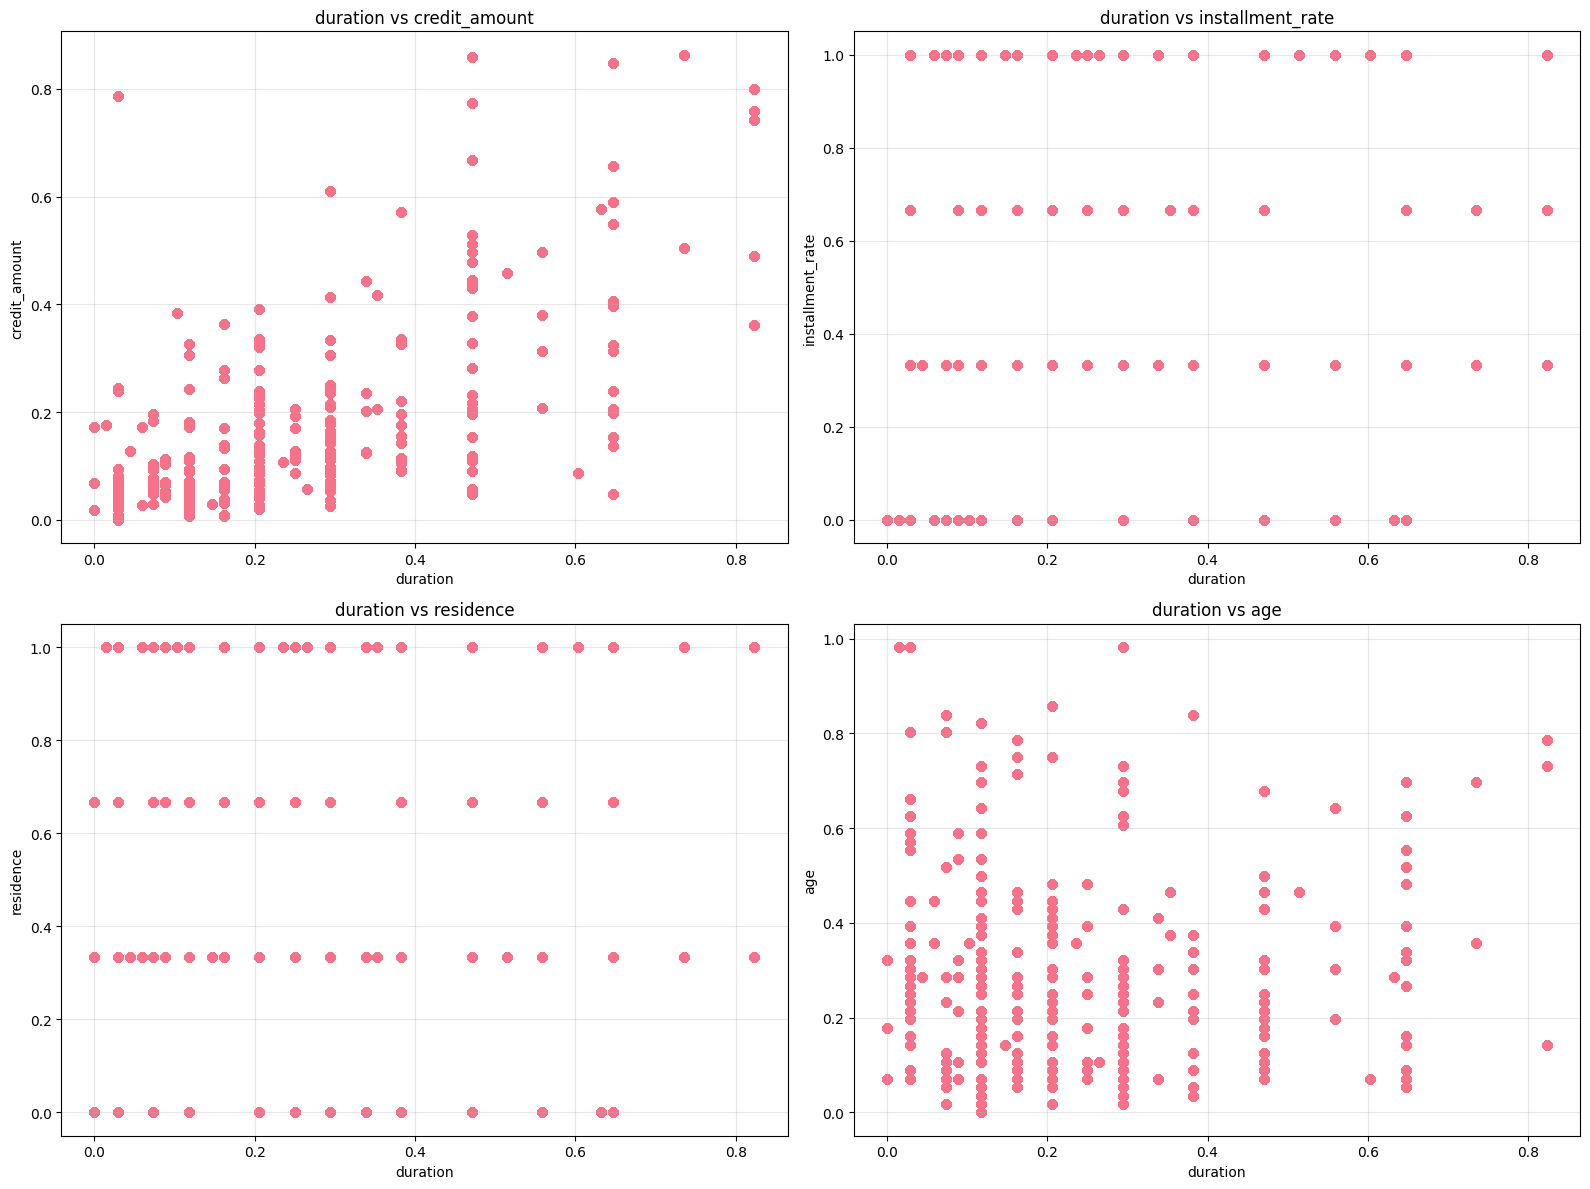

In [27]:
# Scatter plots for numerical variables (sample pairs)
if len(numeric_cols) >= 2:
    # Create scatter plots for interesting pairs
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    axes = axes.flatten()
    
    # Select first 4 pairs of numerical columns
    pairs_plotted = 0
    for i in range(len(numeric_cols)):
        for j in range(i+1, len(numeric_cols)):
            if pairs_plotted < 4:
                col1, col2 = numeric_cols[i], numeric_cols[j]
                
                # Basic scatter plot
                axes[pairs_plotted].scatter(df[col1], df[col2], alpha=0.6)
                axes[pairs_plotted].set_xlabel(col1)
                axes[pairs_plotted].set_ylabel(col2)
                axes[pairs_plotted].set_title(f'{col1} vs {col2}')
                axes[pairs_plotted].grid(True, alpha=0.3)
                
                pairs_plotted += 1
    
    # Hide unused subplots
    for i in range(pairs_plotted, 4):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()
else:
    print("Not enough numerical columns for scatter plot analysis.")

In [28]:
# Target variable analysis (if found)
if target_col and target_col in df.columns:
    print(f"=== ANALYSIS BY TARGET VARIABLE: {target_col} ===")
    
    # Numerical variables vs target
    if len(numeric_cols) > 0:
        numeric_analysis_cols = [col for col in numeric_cols if col != target_col][:4]
        
        if numeric_analysis_cols:
            fig, axes = plt.subplots(2, 2, figsize=(16, 12))
            axes = axes.flatten()
            
            for i, col in enumerate(numeric_analysis_cols):
                if i < 4:
                    # Box plots by target
                    df.boxplot(column=col, by=target_col, ax=axes[i])
                    axes[i].set_title(f'{col} by {target_col}')
                    axes[i].set_xlabel(target_col)
            
            # Hide unused subplots
            for i in range(len(numeric_analysis_cols), 4):
                axes[i].set_visible(False)
            
            plt.tight_layout()
            plt.show()
    
    # Categorical variables vs target
    if len(categorical_cols) > 0:
        cat_analysis_cols = [col for col in categorical_cols if col != target_col][:4]
        
        if cat_analysis_cols:
            fig, axes = plt.subplots(2, 2, figsize=(16, 12))
            axes = axes.flatten()
            
            for i, col in enumerate(cat_analysis_cols):
                if i < 4 and df[col].nunique() <= 10:  # Only for low cardinality
                    # Stacked bar chart
                    crosstab = pd.crosstab(df[col], df[target_col])
                    crosstab.plot(kind='bar', ax=axes[i], stacked=True)
                    axes[i].set_title(f'{col} vs {target_col}')
                    axes[i].set_xlabel(col)
                    axes[i].tick_params(axis='x', rotation=45)
            
            # Hide unused subplots
            for i in range(len([col for col in cat_analysis_cols if df[col].nunique() <= 10]), 4):
                axes[i].set_visible(False)
            
            plt.tight_layout()
            plt.show()
            
else:
    print("No target variable identified for relationship analysis.")

No target variable identified for relationship analysis.


## 4. Key Insights and Conclusions

Based on our comprehensive exploratory data analysis, let's summarize the key findings and insights from the credit risk dataset.

In [29]:
# Generate comprehensive insights report
print("=" * 60)
print("         CREDIT RISK DATA ANALYSIS INSIGHTS")
print("=" * 60)

# Dataset Overview Insights
print("\n🔍 DATASET OVERVIEW:")
print(f"• Dataset contains {df.shape[0]:,} records with {df.shape[1]} features")
print(f"• Memory footprint: {df.memory_usage(deep=True).sum() / 1024**2:.1f} MB")
print(f"• Data types: {len(numeric_cols)} numerical, {len(categorical_cols)} categorical")

# Data Quality Insights
if missing_count == 0:
    print(f"• ✅ Data quality: Excellent - No missing values detected")
else:
    missing_percentage = (missing_count / (df.shape[0] * df.shape[1])) * 100
    print(f"• ⚠️  Data quality: {missing_count:,} missing values ({missing_percentage:.1f}%)")

# Feature Distribution Insights
print("\n📊 FEATURE DISTRIBUTION INSIGHTS:")

if len(numeric_cols) > 0:
    print(f"• {len(numeric_cols)} numerical features available for modeling")
    
    # Skewness analysis
    skewed_features = []
    for col in numeric_cols:
        skewness = df[col].skew()
        if abs(skewness) > 1:
            skewed_features.append((col, skewness))
    
    if skewed_features:
        print(f"• {len(skewed_features)} features show high skewness (may need transformation):")
        for col, skew in sorted(skewed_features, key=lambda x: abs(x[1]), reverse=True)[:3]:
            print(f"  - {col}: {skew:.2f}")
    
    # Outlier insights
    total_outliers = 0
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]
        total_outliers += len(outliers)
    
    outlier_percentage = (total_outliers / (len(df) * len(numeric_cols))) * 100
    print(f"• Outlier analysis: {outlier_percentage:.1f}% of numerical data points are outliers")

if len(categorical_cols) > 0:
    print(f"• {len(categorical_cols)} categorical features for analysis")
    
    # Cardinality insights
    high_cardinality = [col for col in categorical_cols if df[col].nunique() / len(df) > 0.8]
    if high_cardinality:
        print(f"• ⚠️  {len(high_cardinality)} features have high cardinality (may be identifiers):")
        for col in high_cardinality[:3]:
            print(f"  - {col}: {df[col].nunique()} unique values")

print("\n🔗 RELATIONSHIP INSIGHTS:")

# Correlation insights
if len(numeric_cols) >= 2:
    correlation_matrix = df[numeric_cols].corr()
    high_corr_pairs = []
    
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            corr_val = abs(correlation_matrix.iloc[i, j])
            if corr_val > 0.7:
                high_corr_pairs.append((correlation_matrix.columns[i], 
                                       correlation_matrix.columns[j], 
                                       correlation_matrix.iloc[i, j]))
    
    if high_corr_pairs:
        print(f"• Found {len(high_corr_pairs)} highly correlated feature pairs (|r| > 0.7)")
        print("  This suggests potential multicollinearity issues")
    else:
        print("• No strong correlations found between numerical features")

# Target variable insights
if target_col and target_col in df.columns:
    print(f"\n🎯 TARGET VARIABLE INSIGHTS ({target_col}):")
    target_dist = df[target_col].value_counts(normalize=True)
    print(f"• Class distribution:")
    for class_val, proportion in target_dist.items():
        print(f"  - {class_val}: {proportion:.1%}")
    
    # Check for class imbalance
    minority_class = target_dist.min()
    if minority_class < 0.1:
        print("• ⚠️  Severe class imbalance detected - consider rebalancing techniques")
    elif minority_class < 0.3:
        print("• ⚠️  Moderate class imbalance - may need special handling")
    else:
        print("• ✅ Reasonably balanced classes")

else:
    print("• No clear target variable identified - this might be unsupervised learning data")

print("\n" + "=" * 60)

         CREDIT RISK DATA ANALYSIS INSIGHTS

🔍 DATASET OVERVIEW:
• Dataset contains 100,000 records with 62 features
• Memory footprint: 47.3 MB
• Data types: 62 numerical, 0 categorical
• ✅ Data quality: Excellent - No missing values detected

📊 FEATURE DISTRIBUTION INSIGHTS:
• 62 numerical features available for modeling
• 48 features show high skewness (may need transformation):
  - purpose_A48: 11.56
  - purpose_A410: 8.89
  - job_A171: 8.89
• Outlier analysis: 6.6% of numerical data points are outliers

🔗 RELATIONSHIP INSIGHTS:
• Found 5 highly correlated feature pairs (|r| > 0.7)
  This suggests potential multicollinearity issues
• No clear target variable identified - this might be unsupervised learning data



### 4.1 Recommendations for Model Development

Based on the analysis above, here are specific recommendations for the next steps in the credit risk modeling pipeline:

In [30]:
# Model development recommendations
print("🚀 RECOMMENDATIONS FOR MODEL DEVELOPMENT:")
print("-" * 50)

print("\n1. DATA PREPROCESSING:")
if missing_count > 0:
    print("   • Handle missing values using appropriate imputation strategies")
else:
    print("   • ✅ No missing value handling required")

if len(numeric_cols) > 0:
    skewed_count = len([col for col in numeric_cols if abs(df[col].skew()) > 1])
    if skewed_count > 0:
        print(f"   • Apply transformations (log, Box-Cox) to {skewed_count} skewed features")
    
    print("   • Consider feature scaling/normalization for numerical variables")

if len(categorical_cols) > 0:
    high_card_count = len([col for col in categorical_cols if df[col].nunique() / len(df) > 0.8])
    if high_card_count > 0:
        print(f"   • Handle {high_card_count} high-cardinality categorical variables")
        print("     (consider target encoding or dimensionality reduction)")
    
    print("   • Encode categorical variables (one-hot, label, or target encoding)")

print("\n2. FEATURE ENGINEERING:")
print("   • Create interaction features between important variables")
print("   • Consider polynomial features for non-linear relationships")
print("   • Derive domain-specific features (debt-to-income ratio, etc.)")

if len(numeric_cols) >= 2:
    correlation_matrix = df[numeric_cols].corr()
    high_corr_count = 0
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            if abs(correlation_matrix.iloc[i, j]) > 0.7:
                high_corr_count += 1
    
    if high_corr_count > 0:
        print(f"   • Address multicollinearity in {high_corr_count} feature pairs")
        print("     (use VIF analysis, PCA, or feature selection)")

print("\n3. MODEL SELECTION:")
if target_col and target_col in df.columns and df[target_col].nunique() == 2:
    print("   • Binary classification problem detected")
    print("   • Consider: Logistic Regression, Random Forest, XGBoost, LightGBM")
    
    # Class balance check
    target_dist = df[target_col].value_counts(normalize=True)
    minority_class = target_dist.min()
    if minority_class < 0.3:
        print("   • Use stratified sampling and appropriate evaluation metrics")
        print("   • Consider rebalancing techniques (SMOTE, undersampling)")
elif target_col and target_col in df.columns and df[target_col].nunique() > 2:
    print("   • Multi-class classification or regression problem")
else:
    print("   • Problem type unclear - investigate target variable")

print("\n4. MODEL EVALUATION:")
print("   • Use cross-validation for robust performance estimation")
if target_col and target_col in df.columns and df[target_col].nunique() == 2:
    minority_class = df[target_col].value_counts(normalize=True).min()
    if minority_class < 0.3:
        print("   • Focus on Precision, Recall, F1-score, and AUC-ROC")
        print("   • Consider cost-sensitive learning approaches")
    else:
        print("   • Standard classification metrics (Accuracy, Precision, Recall)")

print("   • Implement feature importance analysis")
print("   • Perform residual analysis and model diagnostics")

print("\n5. BUSINESS CONSIDERATIONS:")
print("   • Ensure model interpretability for regulatory compliance")
print("   • Implement proper model governance and monitoring")
print("   • Consider fairness and bias assessment")
print("   • Plan for model deployment and real-time scoring")

print("\n" + "=" * 50)
print("End of Data Exploration Analysis")
print("=" * 50)

🚀 RECOMMENDATIONS FOR MODEL DEVELOPMENT:
--------------------------------------------------

1. DATA PREPROCESSING:
   • ✅ No missing value handling required
   • Apply transformations (log, Box-Cox) to 48 skewed features
   • Consider feature scaling/normalization for numerical variables

2. FEATURE ENGINEERING:
   • Create interaction features between important variables
   • Consider polynomial features for non-linear relationships
   • Derive domain-specific features (debt-to-income ratio, etc.)
   • Address multicollinearity in 5 feature pairs
     (use VIF analysis, PCA, or feature selection)

3. MODEL SELECTION:
   • Problem type unclear - investigate target variable

4. MODEL EVALUATION:
   • Use cross-validation for robust performance estimation
   • Implement feature importance analysis
   • Perform residual analysis and model diagnostics

5. BUSINESS CONSIDERATIONS:
   • Ensure model interpretability for regulatory compliance
   • Implement proper model governance and monito